In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import streamlit as st
import country_converter as coco
import plotly.figure_factory as ff
from wordcloud import WordCloud
mpl.style.use('ggplot') 

In [2]:
some_names = ['US','CA','DE','IN','GB']
standard_names = coco.convert(names= some_names, to = 'name_short')
print(standard_names)
type(standard_names)

['United States', 'Canada', 'Germany', 'India', 'United Kingdom']


list

In [3]:
# df_agg = pd.read_csv('Aggregated_Metrics_By_Video.csv').iloc[1:]
# df_agg.columns = ['Video','Video title','Video publish time','Comments added','Shares','Dislikes','Likes','Subscribers lost','Subscribers gained','RPM(USD)','CPM(USD)',
#                 'Average % viewed','Average view duration','Views','Watch time (hours)','Subscribers','Your estimated revenue (USD)','Impressions','Impressions ctr(%)']


In [4]:
# df_agg.head()


In [5]:
# df_agg.iloc[1:10]

In [6]:
df_con = pd.read_csv('Aggregated_Metrics_By_Country_And_Subscriber_Status.csv')
# df_con.head()

In [7]:
# df_con_sort = df_con.sort_values(['Country Code'], ascending=False)

# df_con_sort.head()

In [8]:
df_grp = df_con.groupby('Country Code', axis=0).sum()
df_grp.head()


,Video Length,Is Subscribed,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
Country Code,,,,,,,,,,,
AD,83316,30,193,5,0,0,4,0,32.535294,21152.216254,0
AE,396754,216,30854,1170,25,42,829,17,144.859894,87860.148091,0
AF,125373,71,867,31,2,2,34,3,40.015157,20526.012475,0
AG,70955,32,159,23,2,1,4,0,28.664613,24328.859961,0
AI,3294,0,12,2,0,0,0,0,0.787936,459.699333,0


In [9]:
df_dp = df_grp.sort_values(['Views'],ascending=False)
df_ddp = df_dp.drop(['Video Length','Is Subscribed','Video Likes Added','Video Dislikes Added','Video Likes Removed','User Subscriptions Added','User Subscriptions Removed',
'Average View Percentage','Average Watch Time','User Comments Added'], axis=1)
df_ddp.head()

,Views
Country Code,
US,1354450
IN,1155510
GB,239177
CA,222373
DE,172165


In [10]:
# some_names = ['US','CA','DE','IN','GB']
# # some_names = ['US','CA','DE','IN','GB']
# # standard_names = coco.convert(names= some_names, to = 'name_short')
# # print(standard_names)
# # type(standard_names)
# df_ddp['Country Code']  = coco.convert(names= df_ddp['Country Code'], to = 'name_short')
# df_ddp['Country Code']
# df_ddp

In [11]:
# import matplotlib.pyplot as plt 
# import matplotlib as mpl

# df_ddp['Views'].head().plot(kind='barh')

In [12]:
# df_ddp.index= map(int,df_ddp.index)
# df_ddp['Views'].head().plot(kind='pie',
#                             figsize=(10,8),
#                             autopct='%1.1f%%',
#                             startangle=90,
#                             shadow=False,
#                             labels=None,
#                             pctdistance=1.12,
#                             )

# plt.axis('equal')
# plt.title('Views from Top 5 countires in percentage' , y=1.12)
# plt.legend(labels=df_ddp.index , loc='upper left')
# plt.show()

In [13]:
import plotly.express as px
list =['United States of America', 'India','Great Britain','Canada','Germany']
# df_cr = df_ddp.head()
# # df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
# # df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
# fig = px.pie(df_cr , names=list, values=df_cr['Views'], title='Countries contributing to')
# fig.show()


In [14]:
df_ddp.head().index

Index(['US', 'IN', 'GB', 'CA', 'DE'], dtype='object', name='Country Code')

In [15]:
# print(df_cr= df_ddp.head())

In [16]:
df_con = pd.read_csv('Aggregated_Metrics_By_Country_And_Subscriber_Status.csv')
df_grp = df_con.groupby('Country Code', axis=0).sum()

df_dp = df_grp.sort_values(['Views'],ascending=False)
df_ddp = df_dp.drop(['Video Length','Is Subscribed','Video Likes Added','Video Dislikes Added','Video Likes Removed','User Subscriptions Added','User Subscriptions Removed',
'Average View Percentage','Average Watch Time','User Comments Added'], axis=1)
# list =['United States of America', 'India','Great Britain','Canada','Germany']
df_cr = df_ddp.head(10)
df_cr.index= coco.convert(names = df_cr.index, to = 'name_short')
fig = px.pie(df_cr , names=df_cr.index, values=df_cr['Views'], title='Countries contributing to the most views')#df_cr.index
fig.show()

In [17]:
df_vpo = pd.read_csv('Aggregated_Metrics_By_Video.csv')
df_vpo.columns = ['Video','Video title','Video publish time','Comments added','Shares','Dislikes','Likes','Subscribers lost','Subscribers gained','RPM(USD)','CPM(USD)',
                        'Average % viewed','Average view duration','Views','Watch time (hours)','Subscribers','Your estimated revenue (USD)','Impressions','Impressions ctr(%)']
# df_vpo.head()
df_vpo.isnull().sum()

Video                           0
Video title                     1
Video publish time              1
Comments added                  0
Shares                          0
Dislikes                        0
Likes                           0
Subscribers lost                0
Subscribers gained              0
RPM(USD)                        0
CPM(USD)                        2
Average % viewed                0
Average view duration           0
Views                           0
Watch time (hours)              0
Subscribers                     0
Your estimated revenue (USD)    0
Impressions                     0
Impressions ctr(%)              0
dtype: int64

In [18]:
df_cl = df_vpo.dropna()
df_cl.isnull().sum()


Video                           0
Video title                     0
Video publish time              0
Comments added                  0
Shares                          0
Dislikes                        0
Likes                           0
Subscribers lost                0
Subscribers gained              0
RPM(USD)                        0
CPM(USD)                        0
Average % viewed                0
Average view duration           0
Views                           0
Watch time (hours)              0
Subscribers                     0
Your estimated revenue (USD)    0
Impressions                     0
Impressions ctr(%)              0
dtype: int64

In [19]:
df_cl.head()

,Video,Video title,Video publish time,Comments added,Shares,Dislikes,Likes,Subscribers lost,Subscribers gained,RPM(USD),CPM(USD),Average % viewed,Average view duration,Views,Watch time (hours),Subscribers,Your estimated revenue (USD),Impressions,Impressions ctr(%)
1,4OZip0cgOho,How I Would Learn Data Science (If I Had to St...,"May 8, 2020",907,9583,942,46903,451,46904,6.353,12.835,36.65,0:03:09,1253559,65850.7042,46453,7959.533,26498799,3.14
2,78LjdAAw0wA,100K Channel Update + AMA Stream!,"Nov 12, 2020",412,4,4,130,15,12,2.668,6.259,6.26,0:05:14,2291,200.2966,-3,6.113,188318,0.72
3,hO_YKK_0Qck,Uber Driver to Machine Learning Engineer in 9 ...,"Jul 16, 2020",402,152,15,881,9,198,9.516,11.695,15.12,0:10:21,21350,3687.3387,189,202.963,442334,2.53
4,uXLnbdHMf8w,Why I'm Starting Data Science Over Again.,"Aug 29, 2020",375,367,22,2622,40,1957,3.143,7.943,33.41,0:02:36,49564,2148.3110,1917,155.779,521185,4.01
5,Xgg7dIKys9E,Interview with the Director of AI Research @ N...,"Aug 5, 2020",329,118,15,590,11,161,2.973,7.425,9.55,0:04:37,13429,1034.3945,150,39.920,210876,3.38


In [20]:
df_cl['Video publish time'] = pd.to_datetime(df_cl['Video publish time'])

In [21]:
df_cl['Month'] = df_cl['Video publish time'].dt.month
df_cl['Years'] = df_cl['Video publish time'].dt.year
df_cl['Month_name'] = df_cl['Video publish time'].dt.month_name()

In [22]:
import plotly.express as px
# fig = px.line(df_cl, x=df_cl['Video publish time'], y=df_cl['Views'])
# fig.show()

In [23]:
df_vpo = pd.read_csv('Video_Performance_Over_Time.csv')
df_vpo.isnull().sum()

Date                             0
Video Title                      0
External Video ID                0
Video Length                     0
Thumbnail link                   0
Views                            0
Video Likes Added                0
Video Dislikes Added             0
Video Likes Removed              0
User Subscriptions Added         0
User Subscriptions Removed       0
Average View Percentage       1347
Average Watch Time            1347
User Comments Added              0
dtype: int64

In [24]:
df_cl = df_vpo.dropna()
df_cl.isnull().sum()

Date                          0
Video Title                   0
External Video ID             0
Video Length                  0
Thumbnail link                0
Views                         0
Video Likes Added             0
Video Dislikes Added          0
Video Likes Removed           0
User Subscriptions Added      0
User Subscriptions Removed    0
Average View Percentage       0
Average Watch Time            0
User Comments Added           0
dtype: int64

In [25]:
df_cl.head()


,Date,Video Title,External Video ID,Video Length,Thumbnail link,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
0,19 Jan 2022,Kaggle Project From Scratch - Part 2 (Explorat...,KQ80oD_boBM,2191,https://i.ytimg.com/vi/KQ80oD_boBM/hqdefault.jpg,13,0,0,0,0,0,0.069055,151.300154,0
1,19 Jan 2022,Welcome To My Channel | Ken Jee | Data Science,smeFkHwnM_k,51,https://i.ytimg.com/vi/smeFkHwnM_k/hqdefault.jpg,2,0,0,0,1,0,0.471255,24.034000,0
2,19 Jan 2022,How She Dominated the FAANG Data Science Inter...,vfV4nm004VQ,2686,https://i.ytimg.com/vi/vfV4nm004VQ/hqdefault.jpg,10,0,0,0,0,0,0.126049,338.567500,0
3,19 Jan 2022,The 9 Books That Changed My Perspective in 2019,3TrAYmrmA8o,980,https://i.ytimg.com/vi/3TrAYmrmA8o/hqdefault.jpg,1,0,0,0,0,0,0.011508,11.278000,0
4,19 Jan 2022,Interview with the Director of AI Research @ N...,Xgg7dIKys9E,2904,https://i.ytimg.com/vi/Xgg7dIKys9E/hqdefault.jpg,1,0,0,0,0,0,0.007541,21.900000,0


In [26]:
df_cl['Date'] = pd.to_datetime(df_cl['Date'])

In [27]:
df_cl['Year'] = df_cl['Date'].dt.year
df_cl['Month'] = df_cl['Date'].dt.month

In [28]:
import plotly.express as px
# fig = px.line(df_cl, x=df_cl['Date'], y=df_cl['Views'])
# fig.show()

In [29]:
df_agg = pd.read_csv('Aggregated_Metrics_By_Video.csv').iloc[1:, :]
df_agg.columns = ['Video', 'Video title', 'Video publish time', 'Comments added', 'Shares', 'Dislikes', 'Likes',
                    'Subscribers lost', 'Subscribers gained', 'RPM(USD)', 'CPM(USD)', 'Average % viewed', 'Average view duration',
                    'Views', 'Watch time (hours)', 'Subscribers', 'Your estimated revenue (USD)', 'Impressions', 'Impressions ctr(%)']
df_agg_sub = pd.read_csv('Aggregated_Metrics_By_Country_And_Subscriber_Status.csv')                    

In [30]:
def audience_simple(country):
    """Show top represented countries"""
    if country == 'US':
        return 'USA'
    elif country == 'IN':
        return 'India'
    elif country == 'GB':
        return 'Great Britain'
    elif country == 'CA':
        return 'Canada'
    elif country == 'DE':
        return 'Germany'
    else:
        return 'Other'

In [31]:
df_con = pd.read_csv('Aggregated_Metrics_By_Country_And_Subscriber_Status.csv')
df_grp = df_con.groupby('Country Code', axis=0).sum()

df_dp = df_grp.sort_values(['Views'],ascending=False)
df_ddp = df_dp.drop(['Video Length','Is Subscribed','Video Likes Added','Video Dislikes Added','Video Likes Removed','User Subscriptions Added','User Subscriptions Removed',
'Average View Percentage','Average Watch Time','User Comments Added'], axis=1)
# list =['United States of America', 'India','Great Britain','Canada','Germany']
df_cr = df_ddp
df_cr.index= coco.convert(names = df_cr.index, to = 'name_short')
# fig = px.pie(df_cr , names=df_cr.index, values=df_cr['Views'], title='Countries contributing to the most views')#df_cr.index
# fig.show()
df_cr

2022-10-12 21:26:27.331 WARNING country_converter.country_converter: ZZ not found in ISO2


,Views
United States,1354450
India,1155510
United Kingdom,239177
Canada,222373
Germany,172165
...,...
Eritrea,2
Niue,1
St. Barths,1
Falkland Islands,1


In [32]:
videos = tuple(df_agg['Video title'])
# st.write("Individual Video Performance")
video_select = st.selectbox('Pick a Video:', videos)
agg_filtered = df_agg[df_agg['Video title'] == video_select]
agg_sub_filtered = df_agg_sub[df_agg_sub['Video Title'] == video_select] # sort in another variable and pass

# agg_sub_filtered= agg_sub_filtered.groupby('Country Code',axis = 0).sum()
# agg_sub_filtered = agg_sub_filtered.sort_values(['Views'] , ascending=False)

agg_sub_filtered['Country'] = coco.convert(names= agg_sub_filtered['Country Code'], to = 'name_short')


# df_1 = df_1.sort_values('Views',ascending=False,inplace=True)
agg_sub_filtered.sort_values('Views',ascending=False, inplace=True)


fig = px.bar(agg_sub_filtered, x='Views', y='Is Subscribed', color='Country', orientation='h')


2022-10-12 21:26:28.523 
  command:

    streamlit run c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2022-10-12 21:26:28.867 nan not found in ISO3
2022-10-12 21:26:28.902 nan not found in ISO3
2022-10-12 21:26:28.954 nan not found in ISO3
2022-10-12 21:26:29.026 ZZ not found in ISO2
2022-10-12 21:26:29.159 ZZ not found in ISO2


In [33]:
df_1 = agg_sub_filtered
df_1 = df_1.sort_values('Views',ascending=False,inplace=True)
df_1

In [34]:
fig.show()

In [35]:
some_names = ['US','CA','DE','IN','GB']
standard_names = coco.convert(names= some_names, to = 'name_short')
print(standard_names)
type(standard_names)

['United States', 'Canada', 'Germany', 'India', 'United Kingdom']


list

In [36]:
df_ag = pd.read_csv('Aggregated_Metrics_By_Video.csv')

In [37]:
df_ag.describe()

,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,222.000000,224.000000,2.240000e+02,224.000000,224.000000,224.000000,2.240000e+02,224.000000
mean,126.750000,353.924107,34.839286,2008.919643,217.620536,1608.084821,4.442040,11.442779,34.087277,4.971645e+04,2835.711522,1390.464286,259.537433,9.013573e+05,3.084152
std,948.732371,2736.321694,268.668317,15387.274015,3058.766918,15628.834115,1.789148,3.334781,15.118746,3.810302e+05,21662.566897,12647.246927,2011.119492,6.967916e+06,1.670448
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.439000,5.230000,6.000000e+01,1.068400,-21.000000,0.000000,3.650000e+02,0.490000
25%,18.000000,19.000000,1.000000,163.500000,2.000000,27.000000,3.220750,9.379500,23.602500,3.940000e+03,177.037125,19.750000,12.208250,9.947100e+04,1.925000
50%,37.000000,46.500000,4.000000,342.500000,7.000000,70.000000,4.334500,11.169500,35.120000,8.347500e+03,397.852200,62.500000,32.595500,1.541925e+05,2.895000
75%,66.250000,114.250000,11.000000,716.000000,14.000000,245.500000,5.372250,12.901000,43.462500,1.836875e+04,1145.621400,230.500000,96.814750,2.894885e+05,3.975000
max,14197.000000,39640.000000,3902.000000,225021.000000,45790.000000,229241.000000,10.387000,37.786000,76.600000,5.568487e+06,317602.353600,183451.000000,29068.652000,1.009541e+08,11.510000


In [38]:
df_ag.drop([0,1], axis = 0, inplace = True)

In [39]:
df_ag.reset_index(drop = True , inplace = True)
df_ag.describe()

,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,220.000000,222.000000,222.000000,222.000000,222.000000,222.000000,2.220000e+02,222.000000
mean,59.855856,135.387387,13.333333,802.135135,11.288288,378.675676,4.429676,11.433964,34.109414,19434.409910,1133.992447,367.387387,95.081982,3.353656e+05,3.083559
std,72.030266,371.671269,31.276416,1812.647270,15.462339,1097.253743,1.791702,3.348437,15.177676,34719.189729,2078.429338,1085.593594,173.948341,6.387680e+05,1.677978
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.439000,5.230000,60.000000,1.068400,-21.000000,0.000000,3.650000e+02,0.490000
25%,18.000000,19.000000,1.000000,162.500000,2.000000,27.000000,3.218250,9.375000,23.427500,3926.000000,176.953975,19.250000,12.082750,9.840900e+04,1.915000
50%,37.000000,46.000000,4.000000,339.500000,7.000000,67.500000,4.334000,11.144000,35.120000,8221.500000,391.651800,62.000000,32.468000,1.537465e+05,2.890000
75%,65.750000,111.000000,11.000000,706.750000,14.000000,226.500000,5.354000,12.912250,43.507500,18225.750000,1099.989425,225.250000,87.484500,2.714405e+05,3.985000
max,412.000000,4694.000000,253.000000,19464.000000,131.000000,10734.000000,10.387000,37.786000,76.600000,297222.000000,17039.656600,10603.000000,1217.046000,5.447045e+06,11.510000


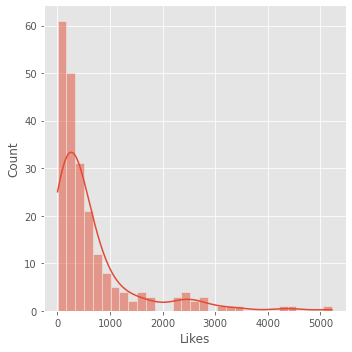

In [40]:
q = df_ag['Likes'].quantile(0.99)
data_1 = df_ag[df_ag['Likes']<q]
sns.displot(data_1['Likes'],kde=True)

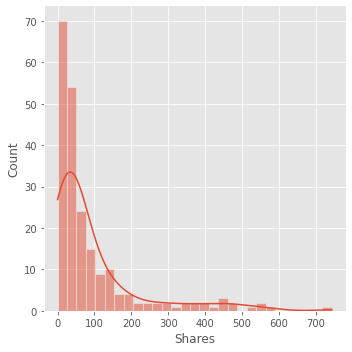

In [41]:
q = data_1['Shares'].quantile(0.99)
data_2 = data_1[data_1['Shares']<q]
sns.displot(data_2['Shares'],kde=True)

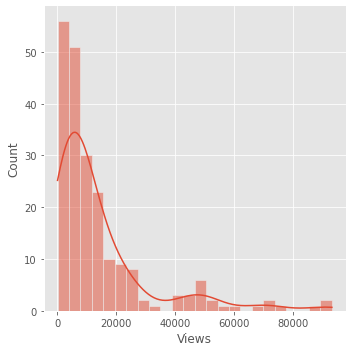

In [42]:
q = data_2['Views'].quantile(0.99)
data_3 = data_2[data_2['Views']<q]
sns.displot(data_3['Views'],kde=True)

In [43]:
data_cleaned = data_3.reset_index(drop=True)

In [44]:
# data_cleaned.drop([209], axis = 0, inplace = True)
data_cleaned.describe()

,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,211.000000,213.000000,213.000000,213.000000,213.000000,213.000000,2.130000e+02,213.000000
mean,54.812207,86.661972,10.563380,541.713615,9.075117,217.286385,4.404155,11.411782,34.138169,13931.338028,839.336238,208.211268,69.025840,2.683179e+05,3.013991
std,67.870176,118.722080,27.640925,635.758125,9.533159,401.187045,1.805025,3.389116,15.408304,17509.236915,1306.548898,396.259001,108.509929,5.081239e+05,1.647865
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.439000,5.230000,60.000000,1.068400,-21.000000,0.000000,3.650000e+02,0.490000
25%,17.000000,17.000000,1.000000,157.000000,2.000000,25.000000,3.204000,9.373000,23.140000,3673.000000,172.302300,19.000000,11.996000,9.747600e+04,1.900000
50%,36.000000,42.000000,4.000000,309.000000,6.000000,65.000000,4.334000,11.016000,34.980000,7705.000000,368.281600,58.000000,30.787000,1.486290e+05,2.730000
75%,62.000000,91.000000,9.000000,637.000000,13.000000,195.000000,5.326000,12.898000,44.130000,15398.000000,922.037700,188.000000,64.756000,2.424130e+05,3.910000
max,412.000000,584.000000,253.000000,3530.000000,53.000000,2395.000000,10.387000,37.786000,76.600000,93329.000000,9057.275200,2362.000000,767.493000,5.447045e+06,11.510000


In [45]:
# LINEARITY - To check for linearity we have to plot the dependent variable against the independent variable on the scatter plot 

fig_dp = px.scatter(data_cleaned,x='Likes',y='Shares',trendline='ols',trendline_color_override='red')
fig_dp.show()

fig_dp1 = px.scatter(data_cleaned, x='Likes',y='Views',trendline='ols',trendline_color_override='red')
fig_dp1.show()

In [46]:
df_agg = pd.read_csv('Aggregated_Metrics_By_Video.csv').iloc[1:,:]

In [47]:
titles_1 = df_agg.loc[df_agg['Sub­scribers'] > 100].sort_values('Sub­scribers', ascending=False)['Video title'][1:].tolist()
words_1 = [word for titles_1 in titles_1 for word in titles_1.split()]
words_1_joined=(" ").join(words_1)
# wordcloud = WordCloud(width = 1000, height = 500).generate(words_1_joined)

titles_2 = df_agg.loc[df_agg['Sub­scribers'] <= 20].sort_values('Sub­scribers', ascending=False)['Video title'].tolist()
words_2 = [word for titles_2 in titles_2 for word in titles_2.split()]
words_2_joined=(" ").join(words_2)
# wordcloud = WordCloud(width = 1000, height = 500).generate(words_2_joined)

word_count1 = pd.DataFrame.from_dict(WordCloud().process_text(words_1_joined), orient='index', columns=['Frequency'])
word_count2 = pd.DataFrame.from_dict(WordCloud().process_text(words_2_joined), orient='index', columns=['Frequency'])


df_word = word_count1.sort_values('Frequency', ascending=False)[:25].sort_values('Frequency')#plot.barh(figsize=(10,7), ax=ax, legend=None, title='biggest amounts of new subsribers')
df_word2 = word_count2.sort_values('Frequency', ascending=False)[:25].sort_values('Frequency')

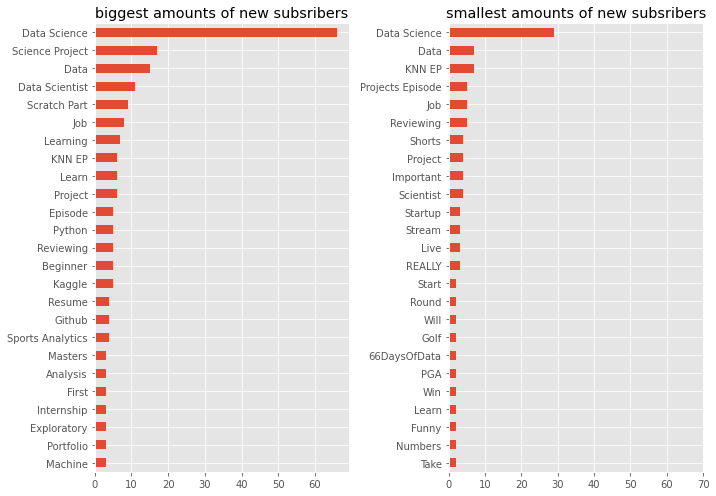

In [48]:
word_count1 = pd.DataFrame.from_dict(WordCloud().process_text(words_1_joined), orient='index', columns=['Frequency'])
word_count2 = pd.DataFrame.from_dict(WordCloud().process_text(words_2_joined), orient='index', columns=['Frequency'])

fig, (ax, ax2) = plt.subplots(ncols=2)
word_count1.sort_values('Frequency', ascending=False)[:25].sort_values('Frequency').plot.barh(figsize=(10,7), ax=ax, legend=None, title='biggest amounts of new subsribers')
word_count2.sort_values('Frequency', ascending=False)[:25].sort_values('Frequency').plot.barh(figsize=(10,7), ax=ax2, legend=None, title='smallest amounts of new subsribers')
fig.tight_layout()
ax2.set_xlim([0, 70])
plt.show()

In [49]:
ddp = df_word
ddp.reset_index(inplace=True)
ddp.columns=['Topic','Frequency']
ddp.head()

,Topic,Frequency
0,Machine,3
1,Portfolio,3
2,Exploratory,3
3,Internship,3
4,First,3


In [50]:
# fig_ddp = px.bar(ddp,x='Frequency',y='Topic',orientation='h',title='topics that gained most subscribers',color='Frequency')
# fig_ddp.show()

In [51]:
ddp_7=df_word2
ddp_7.reset_index(inplace=True)
ddp_7.columns=['Topic','Frequency']
# ddp_7


In [52]:
# fig_ddp7 = px.bar(ddp_7,x='Frequency',y='Topic',orientation='h',title='topics that gained least subscribers',color='Frequency')
# fig_ddp7.show()


In [53]:
fig_ddp = px.bar(ddp,x='Frequency',y='Topic',orientation='h',title='topics that gained most subscribers',color='Frequency')
fig_ddp.update_layout(height=600)
fig_ddp.show()

fig_ddp7 = px.bar(ddp_7,x='Frequency',y='Topic',orientation='h',title='topics that gained least subscribers',color='Frequency')
fig_ddp7.update_layout(height=600)
fig_ddp7.show()

In [ ]:
import gdata.youtube.service

service = gdata.youtube.service.YouTubeService()
feed_url = 'http://gdata.youtube.com/feeds/api/standardfeeds/most_viewed?v=2'
feed = service.GetYouTubeVideoFeed(feed_url)
entry = feed.entry[0] # pick most viewed video as sample entry

thumbnail = entry.media.thumbnail[0].url
    # will be an URL like: 'http://i.ytimg.com/vi/%(video_id)s/default.jpg'
    # when querying YouTube API version 2 ('?v=2' at the end of feed URL)

In [61]:
# importing pafy
import pafy 
    
# url of video 
url = "https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg"
    
# getting video
video = pafy.new(url) 
  
# getting thumbnail of the video
value = video.thumb
  
# printing the value
print("Thumbnail : " + value)

ValueError: Need 11 character video id or the URL of the video. Got https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg